El objetivo del proyecto es predecir el resultado de una partida del videojuego League of Legends. El League of Legends es un videojuego en el que dos equipos formados por cinco jugadores compiten para conseguir la victoria. Las partidas se desarrollan en un mapa en el que se encuentran varios objetivos y con el que los jugadores pueden interactuar. Dependiendo del rendimiento de los jugadores (asesinatos, muertes, asistencias, destrucción de torres...), se puede predecir el ganador de una partida. Una partida finaliza cuando uno de los equipos destruye el nexo del equipo contrario y no puede haber empates. 

# Dataset

El dataset elegido es League Of Legends High elo Ranked Games (2020) que se encuentra en Kaggle. Dicho dataset está separado en tres subconjuntos de partidas dependiendo del elo de los jugadores que han participado en la partida. En el LoL (abreviatura del League of Legends) los jugadores se dividen en diferentes categorías dependiendo del desempeño obtenido a lo largo de su trayectoria. En este dataset únicamente se encuentran las tres mejores divisiones, que serían (por orden de mayor desempeño a menor): Challenger, Grandmaster y Master. Todos los subconjuntos contienen el mismo número de atributos, 50, aunque algunas columnas son redundantes, ya que, solo se necesitan los datos de uno de los dos equipos al haber datos de victorias y derrotas de ambos equipos. Como el fin es predecir el resultado de una partida, únicamente se quiere predecir el valor de una clase, que sería la de blueWins, porque he optado por quedarme con el equipo azul.

# Preprocesamiento de datos

Al haber tres ficheros diferentes, voy a unirlos todos en uno solo y añadir una columna "category" con tres valores posibles para cada división: Challenger 0, Grandmaster 1 y Master 2.

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [126]:
# challenger
df_challenger = pd.read_csv("Challenger_Ranked_Games.csv")
# añadimos una columna más con el valor 0
df_challenger['category'] = 0

# grandmaster
df_grand = pd.read_csv("GrandMaster_Ranked_Games.csv")
# añadimos una columna más con el valor 1
df_grand['category'] = 1

# master
df_master = pd.read_csv("Master_Ranked_Games.csv")
# añadimos una columna más con el valor 2
df_master['category'] = 2

# unimos los tres dataframes
df = pd.concat([df_challenger, df_grand, df_master])

In [127]:
print ('Número total de partidas:', df.shape[0])
print('Challenger:', sum(df['category'] == 0))
print('Grandmaster:', sum(df['category'] == 1))
print('Master:', sum(df['category'] == 2))

Número total de partidas: 199925
Challenger: 26904
Grandmaster: 65896
Master: 107125


Una vez unificados los tres datasets, voy a eliminar las columnas que no aportan ninguna información. Como he dicho anteriormente, he decidido quedarme con los datos del equipo azul. Al final el dataset se queda con 25 columnas, únicamente con información sobre el equipo azul.

In [128]:
df_clean = df.drop(columns=['gameId', 'gameDuraton','redWins', 'redFirstBlood', 'redFirstTower', 'redFirstBaron', 
                            'redFirstDragon', 'redFirstInhibitor', 'redDragonKills', 'redBaronKills', 
                            'redTowerKills', 'redInhibitorKills', 'redWardPlaced', 'redWardkills', 'redKills', 
                            'redDeath', 'redAssist', 'redChampionDamageDealt', 'redTotalGold', 'redTotalMinionKills',
                            'redTotalLevel', 'redAvgLevel', 'redJungleMinionKills', 'redKillingSpree', 'redTotalHeal', 
                            'redObjectDamageDealt'])
df_clean.head()

,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,...,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,category
0,0,1,0,0,0,0,0,0,0,0,...,56039,37001,440,56,11.2,105,4,31035,5675,0
1,1,0,0,0,1,0,2,0,4,0,...,60243,41072,531,63,12.6,111,3,26397,45303,0
2,0,0,0,0,0,0,0,0,0,0,...,24014,22929,306,42,8.4,64,0,6567,5651,0
3,0,0,0,1,1,0,1,1,2,0,...,101607,63447,774,80,16.0,226,3,24718,31019,0
4,1,1,1,1,1,1,2,2,11,3,...,134826,74955,831,83,16.6,252,5,37161,95287,0


Voy a separar las partidas ganadas de las perdidas para analizar la relación que existe entre los atributos y el resultado de la partida basándome en la media de dichos atributos.

In [129]:
df_win = df_clean[df_clean['blueWins'] == 1]
df_loss = df_clean[df_clean['blueWins'] == 0]

In [130]:
df_win.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
blueWins,99154.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
blueFirstBlood,99154.0,0.610646,0.487606,0.0,0.0,1.0,1.00,1.0
blueFirstTower,99154.0,0.750166,0.432919,0.0,1.0,1.0,1.00,1.0
blueFirstBaron,99154.0,0.393771,0.488588,0.0,0.0,0.0,1.00,1.0
blueFirstDragon,99154.0,0.537790,0.498572,0.0,0.0,1.0,1.00,1.0
blueFirstInhibitor,99154.0,0.705398,0.455866,0.0,0.0,1.0,1.00,1.0
blueDragonKills,99154.0,1.932075,1.228732,0.0,1.0,2.0,3.00,7.0
blueBaronKills,99154.0,0.488251,0.614809,0.0,0.0,0.0,1.00,4.0
blueTowerKills,99154.0,6.786756,2.655382,0.0,4.0,7.0,9.00,11.0
blueInhibitorKills,99154.0,1.173780,0.948050,0.0,1.0,1.0,2.00,9.0


In [131]:
df_loss.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
blueWins,100771.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
blueFirstBlood,100771.0,0.404094,0.490718,0.0,0.0,0.0,1.0,1.0
blueFirstTower,100771.0,0.285320,0.451569,0.0,0.0,0.0,1.0,1.0
blueFirstBaron,100771.0,0.082117,0.274544,0.0,0.0,0.0,0.0,1.0
blueFirstDragon,100771.0,0.271596,0.444785,0.0,0.0,0.0,1.0,1.0
blueFirstInhibitor,100771.0,0.065366,0.247172,0.0,0.0,0.0,0.0,1.0
blueDragonKills,100771.0,0.790644,0.995286,0.0,0.0,0.0,1.0,6.0
blueBaronKills,100771.0,0.110280,0.353795,0.0,0.0,0.0,0.0,4.0
blueTowerKills,100771.0,1.940320,2.010840,0.0,0.0,1.0,3.0,11.0
blueInhibitorKills,100771.0,0.128797,0.466240,0.0,0.0,0.0,0.0,7.0


#### Conclusiones

* Torres:
    * La **primera torre** se prioriza **~2.6 veces** más en las partidas ganadas que en las perdidas
    * Las **torres totales destruidas** se priorizan **~3.5 veces** más en las partidas ganadas que en las perdidas
* Inhibidores:
    * El **primer inhibidor** se prioriza **~10.7 veces** más en las partidas ganadas que en las perdidas
    * Los **inhibidores totales destruidos** se priorizan **~9.1 veces** más en las partidas ganadas que en las perdidas
* Dragones/Barones:
    * El **primer dragon** se prioriza **~2.0 veces** más en las partidas ganadas que en las perdidas
    * En las partidas ganadas se asesinan **~2.4 veces** más dragones (**dragones totales asesinados**) que en las partidas perdidas 
    * El **primer Baron** se prioriza **~4.8 veces** más en las partidas ganadas que en las perdidas
    * Los **Barons totales asesinados** se priorizan **~4.4 veces** más en las partidas ganadas que en las perdidas
* Asesinatos/Muertes:
    * La **primera sangre** se prioriza  **~1.5 veces** más en las partidas ganadas que en las perdidas
    * En las partidas ganadas, hay **~1.6 veces** más **asesinatos de equipo** que en las partidas perdidas
    * En las partidas ganadas, hay **~0.6 veces** menos **muertes de equipo** que en las partidas perdidas
* Micro:
    * En las partidas ganadas hay **~1.1 veces** más **wards puestos** que en las partidas perdidas
    * En las partidas ganadas hay **~1.1 veces** más **wards destruidos** que en las partidas perdidas
    * Hay una diferencia del **~15.0%** de **oro** entre las partidas ganadas y las perdidas
    * Hay una diferencia del **~5.0%** de CS (súbditos asesinados) entre las partidas ganadas y las perdidas
    * Hay una diferencia del **~2.0%** en el **daño total** entre las partidas ganadas y las perdidas

Se puede observar que marcan más la diferencia los macro-objetivos (inhibidores, dragones, torres...) que los micro-objetivos (objetos de visión, CS, oro...) a la hora de ganar o perder la partida. Basándome en las conclusiones hechas, voy a visualizar los atributos más destacados (solo los que sean binarios).

In [132]:
def draw_piecharts(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15,15))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        percentages = list(df[var_name].value_counts(normalize=True, sort=False) * 100)
        labels = sorted(df[var_name].unique())
        explode = ([0.02] * len(percentages))
        ax.pie(percentages,shadow=True, explode=explode, labels=labels, autopct='%1.1f%%')
        ax.set_title(var_name)

        ax.legend(
          title="# of occurances",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels, percentages)]
          )
        plt.tight_layout()
    
    plt.show()

In [133]:
columnas_destacadas = ['blueFirstTower', 'blueFirstInhibitor', 'blueFirstDragon', 'blueFirstBaron', 'blueFirstBlood']
grafico_win = df_win[columnas_destacadas]
grafico_loss = df_loss[columnas_destacadas]

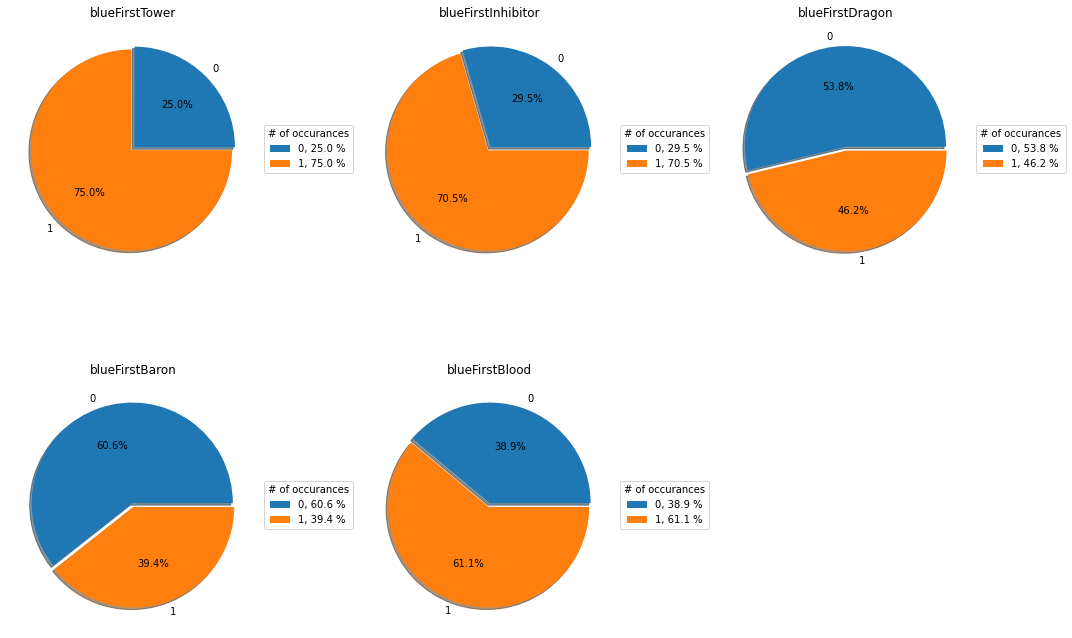

In [134]:
draw_piecharts(grafico_win, grafico_win.columns, 3, 3)

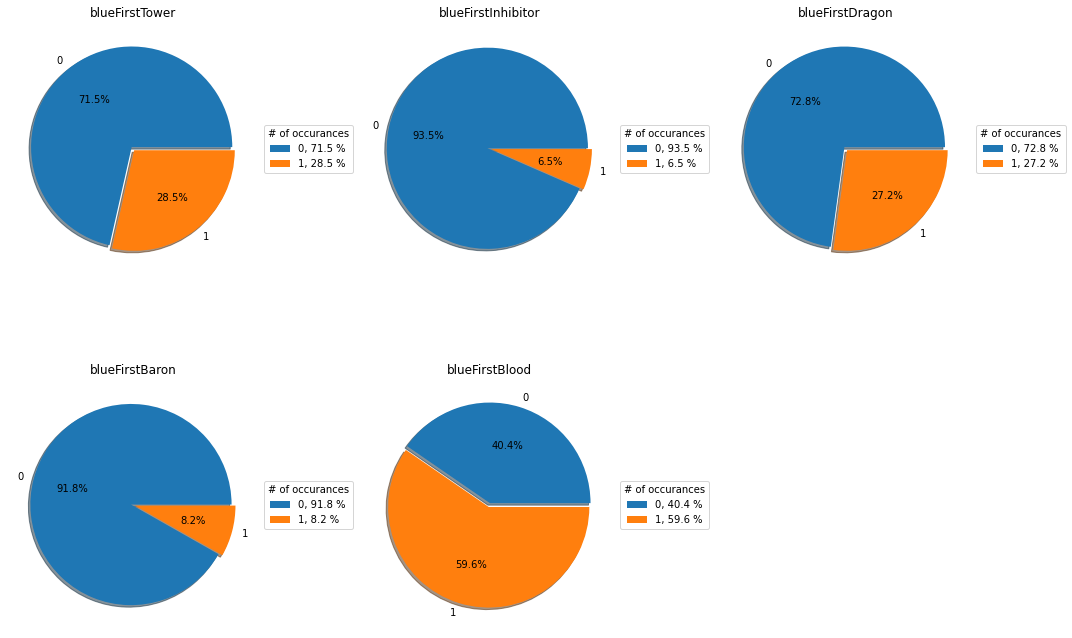

In [135]:
draw_piecharts(grafico_loss, grafico_loss.columns, 3, 3)

#### Conclusiones

* Tanto para las partidas ganadas como las perdidas:
    * Misma probabilidad de obtener **primera sangre**
    * Se prioriza el **primer dragon** por encima del **primer Baron**
* En general para las partidas ganadas los equipos aseguran los objetivos antes (asesinato de macro-objetivos)

# Preparación de los datos


* Variables numéricas (19):
    * blueDragonKills
    * blueDragonKills
    * blueBaronKills
    * blueTowerKills
    * blueInhibitorKills
    * blueWardPlaced
    * blueWardKills
    * blueKills
    * blueDeath
    * blueAssist
    * blueChampionDamageDealt
    * blueTotalGold
    * blueTotalMinionKills
    * blueTotalLevel
    * blueAvgLevel
    * blueJungleMinionKills
    * blueKillingSpree
    * blueTotalHeal
    * blueObjectDamageDealt
    
Visto que la mayoría de variables son numéricas y cada una está en unos rangos muy dispares respecto al resto, sería mejor **normalizar** los datos para que no haya variables que tengan más peso que otras. Para ello voy a utilizar la función MinMaxScaler de sklearn que transforma los datos escalándolos de la siguiente forma:

> $X_{std} = \dfrac{(X - X.min(axis=0))}{(X.max(axis=0) - X.min(axis=0))}$

> $X_{scaled} = X_{std} * (max - min) + min$

Con el objetivo de evaluar el desempeño de los modelos, voy a crear dos subcolecciones de datos:

* **Entrenamiento y validación** para ajustar cada técnica de aprendizaje
* **Test** para comparar las distintas técnicas

Para ello, voy a estratificar los datos para que haya variedad de ejemplos en el subconjunto de entrenamiento y validación con el fin de evitar el sobreaprendizaje. He decidido que un 80% de los datos totales se van a usar para entrenamiento y validación, esto es aproximadamente 160000 partidas, mientras que para el test se usará el restante 20%, aproximadamente 40000 partidas.

In [136]:
numerical_cols = ['blueDragonKills', 'blueDragonKills', 'blueBaronKills', 'blueTowerKills', 'blueInhibitorKills',
                  'blueWardPlaced', 'blueWardkills', 'blueKills', 'blueDeath', 'blueAssist', 'blueChampionDamageDealt',
                  'blueTotalGold', 'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel', 'blueJungleMinionKills',
                  'blueKillingSpree', 'blueTotalHeal', 'blueObjectDamageDealt']
# atributos numéricos
df_numerical = df_clean[numerical_cols]
# atributos no numéricos
df_non_num = df_clean.drop(columns=numerical_cols)

In [137]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_numerical)
# devuelve un array
arr_norm = scaler.transform(df_numerical)
# lo transformamos a dataframe 
df_norm = pd.DataFrame(arr_norm, columns=numerical_cols)
df_norm

,blueDragonKills,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt
0,0.000000,0.000000,0.00,0.000000,0.000000,0.165217,0.110169,0.133929,0.264957,0.085938,0.146897,0.256902,0.290621,0.375000,0.375000,0.261194,0.129032,0.118587,0.033842
1,0.285714,0.285714,0.00,0.363636,0.000000,0.247826,0.152542,0.169643,0.068376,0.121094,0.157918,0.287986,0.350727,0.426471,0.426471,0.276119,0.096774,0.100865,0.270156
2,0.000000,0.000000,0.00,0.000000,0.000000,0.121739,0.059322,0.044643,0.170940,0.031250,0.062949,0.149456,0.202114,0.272059,0.272059,0.159204,0.000000,0.025093,0.033699
3,0.142857,0.142857,0.25,0.181818,0.000000,0.560870,0.330508,0.232143,0.307692,0.175781,0.266347,0.458830,0.511229,0.551471,0.551471,0.562189,0.096774,0.094449,0.184976
4,0.285714,0.285714,0.50,1.000000,0.333333,0.495652,0.296610,0.241071,0.341880,0.183594,0.353425,0.546698,0.548877,0.573529,0.573529,0.626866,0.161290,0.141995,0.568226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199920,0.428571,0.428571,0.25,0.636364,0.111111,0.547826,0.533898,0.375000,0.213675,0.324219,0.374131,0.604048,0.530383,0.617647,0.617647,0.624378,0.419355,0.257907,0.590201
199921,0.000000,0.000000,0.00,0.000000,0.000000,0.086957,0.025424,0.044643,0.196581,0.015625,0.068399,0.150441,0.216645,0.294118,0.294118,0.196517,0.032258,0.051810,0.025082
199922,0.142857,0.142857,0.00,0.545455,0.000000,0.395652,0.372881,0.223214,0.316239,0.140625,0.211393,0.473994,0.504624,0.536765,0.536765,0.512438,0.225806,0.117505,0.289704
199923,0.142857,0.142857,0.00,0.181818,0.000000,0.282609,0.084746,0.205357,0.350427,0.136719,0.209846,0.315535,0.332893,0.404412,0.404412,0.246269,0.129032,0.063147,0.114525


In [138]:
cols = ['blueWins', 'blueFirstBlood', 'blueFirstTower', 'blueFirstBaron',
       'blueFirstDragon', 'blueFirstInhibitor', 'category', 'blueDragonKills', 'blueDragonKills', 'blueBaronKills',
       'blueTowerKills', 'blueInhibitorKills', 'blueWardPlaced',
       'blueWardkills', 'blueKills', 'blueDeath', 'blueAssist',
       'blueChampionDamageDealt', 'blueTotalGold', 'blueTotalMinionKills',
       'blueTotalLevel', 'blueAvgLevel', 'blueJungleMinionKills',
       'blueKillingSpree', 'blueTotalHeal', 'blueObjectDamageDealt']
# volvemos a unir todos los atributos
arr_pre = np.concatenate((df_non_num, df_norm), axis=1)
df_pre = pd.DataFrame(data=arr_pre, columns=cols)
df_pre

,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,category,blueDragonKills,blueDragonKills,blueBaronKills,...,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,...,0.085938,0.146897,0.256902,0.290621,0.375000,0.375000,0.261194,0.129032,0.118587,0.033842
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.285714,0.285714,0.00,...,0.121094,0.157918,0.287986,0.350727,0.426471,0.426471,0.276119,0.096774,0.100865,0.270156
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,...,0.031250,0.062949,0.149456,0.202114,0.272059,0.272059,0.159204,0.000000,0.025093,0.033699
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.142857,0.142857,0.25,...,0.175781,0.266347,0.458830,0.511229,0.551471,0.551471,0.562189,0.096774,0.094449,0.184976
4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.285714,0.285714,0.50,...,0.183594,0.353425,0.546698,0.548877,0.573529,0.573529,0.626866,0.161290,0.141995,0.568226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199920,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.428571,0.428571,0.25,...,0.324219,0.374131,0.604048,0.530383,0.617647,0.617647,0.624378,0.419355,0.257907,0.590201
199921,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000000,0.000000,0.00,...,0.015625,0.068399,0.150441,0.216645,0.294118,0.294118,0.196517,0.032258,0.051810,0.025082
199922,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.142857,0.142857,0.00,...,0.140625,0.211393,0.473994,0.504624,0.536765,0.536765,0.512438,0.225806,0.117505,0.289704
199923,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.142857,0.142857,0.00,...,0.136719,0.209846,0.315535,0.332893,0.404412,0.404412,0.246269,0.129032,0.063147,0.114525


In [139]:
X_pre = df_pre.drop(columns='blueWins')
y_pre = df_pre['blueWins']

In [140]:
from sklearn.model_selection import train_test_split
# Creamos un conjunto de datos estratificado para balancear las clases
X_train, X_test, y_train, y_test = train_test_split(X_pre, y_pre, test_size=0.20, stratify=y_pre)

In [141]:
print('# partidas en el cjto de entrenamiento y validación:', X_train.shape[0])
print('# particas en el cjto de test:', X_test.shape[0])

# partidas en el cjto de entrenamiento y validación: 159940
# particas en el cjto de test: 39985


# Regresión Logística

## Explicación

### Calculo de la función coste y su gradiente
El valor de la función de coste de regresión viene dado por la expresión:

> $J(\theta)=\dfrac{1}{m}\sum\limits_{i=1}^m[-y^{(i)}log(h_{\theta}(x^{(i)}))-(1-y^{(i)})log(1-h_{\theta}(x^{(i)}))]$

que en forma vectorizada se puede calcular como:

> $J(\theta)=\dfrac{1}{m}((log(g(X\theta))^Ty+(log(1-g(X\theta))^T(1-y))$

y el gradiente de la función de coste es un vector de la misma longitud que $\theta$ donde la componente $j$ para $j = 0,1,...,n$ viene dada por la expresión:

> $\dfrac{\partial J(\theta)}{\partial \theta_j}=\dfrac{1}{m}\sum\limits_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)}$

que en forma vectorizada se puede calcular como:

> $\dfrac{\delta J(\theta)}{\delta \theta_j}=\dfrac{1}{m}X^T(g(X\theta)-y)$

Las fórmulas utilizadas para el proyecto son iguales que las utilizadas para la práctica de clase.

In [142]:
import time
start = time.time()

In [143]:
def sigmoid(z):
    #z = np.array(z)
    #g = np.zeros(z.shape)
    g = 1 / (1 + np.exp(-z))
    return g
    
def costFunction(theta, X, y):
    m = y.size
    J = 0
    grad = np.zeros(theta.shape)
    h = sigmoid(X.dot(theta.T))
    J =-(1/m) * (y.dot(np.log(h+1))+(1-y).dot(np.log(1-h+1)))
    grad = (1/m) * (h-y).dot(X)
    return J, grad

In [144]:
m, n = X_train.shape

X_reg = np.concatenate([np.ones((m,1)), X_train], axis=1)
y_reg = y_train

theta_reg = np.zeros((X_reg.shape[1],1))

### Cálculo del valor óptimo de los parámetros

Para obtener el valor de los parámetros de $\theta$ que minimizan la función de coste para la regresión logística he utilizado la función scipy.optimize.minimize de SciPy en vez de la utilizada en la práctica. La función minimize recibe 6 parámetros:

* El nombre de la función a optimizar, en este caso la función de coste
* Un vector con los valores iniciales de los pesos a optimizar
* Una tupla con argumentos extra que se han de pasar a la función a optimizar, en este caso las matrices X e Y
* Método para calcular el gradiente, en este caso TNC
* Máximo número de iteraciones que hacer

In [145]:
from scipy.optimize import minimize
options= {'maxiter': 400}
res = minimize(costFunction, theta_reg, (X_reg, y_reg), jac=True, method='TNC', options=options)
theta_reg = res.x

In [146]:
def predict(theta, X):
    m = X.shape[0]
    p = np.zeros(m)
    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [147]:
X_reg_test = np.concatenate([np.ones((X_test.shape[0],1)), X_test], axis=1)
y_reg_test = y_test
prob_win = sigmoid(np.dot(X_reg_test, theta_reg))
p_train = predict(theta_reg, X_reg)
p_test = predict(theta_reg, X_reg_test)
print('Train Accuracy: {:.2f} %'.format(np.mean(p_train==y_reg) * 100))
print('Test Accuracy: {:.2f} %'.format(np.mean(p_test==y_reg_test) * 100))

Train Accuracy: 95.28 %
Test Accuracy: 95.20 %


## Métricas

In [148]:
from sklearn.metrics import classification_report
cr = classification_report(y_reg_test, p_test, target_names=['0','1'])
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     20154
           1       0.95      0.96      0.95     19831

    accuracy                           0.95     39985
   macro avg       0.95      0.95      0.95     39985
weighted avg       0.95      0.95      0.95     39985



## Tiempos

In [149]:
end = time.time()
print('Tiempo de ejecución transcurrido:', end-start)

Tiempo de ejecución transcurrido: 2.5406436920166016


# Redes neuronales

## Explicación

### Representación del modelo
La red neuronal que voy a utilizar para el proyecto es la misma que la usada en la práctica 4:

![Neural Network](neural_network.png)

Tiene tres capas: **una capa de entrada**, **una capa oculta** y **una capa de salida**. Ya que los datos de entrada cuentan con 26 atributos (incluido el atributo 'blueWins'), el tamaño de la capa de entrada será 25. Respecto a la segunda y tercera capa, estas tendrán tamaño 10 y 2 respectivamente. El número de etiquetas será 2 ya que el proyecto trata de clasificar las partidas en ganadas o perdidas.

In [150]:
import time
start = time.time()

In [151]:
# datos que voy a utilizar para la red neuronal
X_nn_train = X_train.values
y_nn_train = np.array(y_train.array).astype(int)
X_nn_test = X_test.values
y_nn_test = np.array(y_test.array).astype(int)


# algunas variables globales
input_layer_size = 25
hidden_layer_size = 10
output_layer_size = 2
num_labels = 2
n_training_samples = X_nn.shape[0]
lambda_ = 1

# Theta1 y Theta2
Theta1 = np.zeros((hidden_layer_size, input_layer_size + 1))
Theta2 = np.zeros((output_layer_size, hidden_layer_size + 1))

nn_params = np.concatenate((Theta1.ravel(), Theta2.ravel()))

### Feedforward, función de coste regularizada y backpropagation

La **función de coste regularizada** para la red neuronal es la siguiente:

> $J(\theta) = \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}[-y_k^{(i)}log((h_\theta(x^{(i)}))_k)-(1-y_k^{(i)})log(1-(h_\theta(x^{(i)}))_k)]+\dfrac{\lambda}{2m}[\sum\limits_{j=1}^{10}\sum\limits_{k=1}^{25}(\Theta_{j,k}^{(1)})^2+\sum\limits_{j=1}^{2}\sum\limits_{k=1}^{10}(\Theta_{j,k}^{(2)})^2]$

donde $h_{\theta}(x^{(i)})$ se calcula en la figura anterior, y $k=2$, el número total de etiquetas posibles. Véase que $h_{\theta}(x^{(i)})_k=a_k^{(3)}$ Para entrenar la red neuronal, hay que codificar las etiquetas como vectores que contienen 0's o 1's de la siguiente forma: 

> $y = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

Por ejemplo, si $x^{(i)}$ representa una partida ganada, su correspondiente $y^{(i)}$ debería ser vector 2-D con $y_1=1$, e $y_0=0$.

El método nnCostFunction recibe los siguientes parámetros:

* **nn_params**: Los parámetros para la red neuronal como vector. Hay que convertir el vector de nuevo a las matrices Theta1 y Theta2
* **X**: Dataset de entrada. Una matriz de tamaño (m x input_layer_size), en nuestro caso input_layer_size = 25
* **y**: Dataset de etiquetas. Un vector de tamaño (m,)
* **lambda_**: Parámetro de regularización

Y devuelve:

* **J**: El valor calculado de la función de coste con los pesos de la red
* **grad**: Vector de las derivadas parciales de la concatenación de los pesos de la red Theta1 y Theta2

Para calcular el gradiente para la función de coste de la red neuronal voy a utilizar **backpropagation**. La intuición detrás de backpropagation es la siguiente: dado un ejemplo de entrenamiento $(x^{(t)}, y^{(t)})$, primero se hace feedforwarding para calcular las activaciones a lo largo de la red, incluyendo el valor de salida de la hipótesis $h_{\theta}(x)$. Después, para cada nodo $j$ en la capa $l$, calculamos un "término de error" $\delta_j^{(l)}$, que mide cómo de "responsable" es ese nodo de cualquier error en la salida.

Una vez calculado el gradiente podremos entrenar la red neuronal minimizando la función de coste $J(\theta)$ utilizando la función de SciPy optimize.minimize igual que en la regresión lineal.

El gradiente de sigmoid se calcula con la siguiente fórmula:

> $g'(z)=\dfrac{\partial}{\partial z}g(z)=g(z)(1-g(z))$

In [152]:
# Algunas funciones de utilidad
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

def sigmoidGradient(z):
    g = sigmoid(z) * (1 - sigmoid(z))
    return g

In [153]:
def nnCostFunction(nn_params, X, y, lambda_=0.0):
    # Redimensionar nn_params para convertir el vector en las matrices de pesos Theta1 y Theta2
    Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],
                        (hidden_layer_size, (input_layer_size + 1)))
    Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):],
                        (num_labels, (hidden_layer_size + 1)))

    m = y.size
    
    # El valor J es lo que devuelve la función
    J = 0 
    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)
    
    # Feedforwarding
    a1 = np.concatenate([np.ones((m, 1)), X], axis=1)
    
    a2 = sigmoid(a1.dot(Theta1.T))
    a2 = np.concatenate([np.ones((a2.shape[0], 1)), a2], axis=1)
    
    a3 = sigmoid(a2.dot(Theta2.T))
    
    y_matrix = y.reshape(-1)
    y_matrix = np.eye(num_labels)[y_matrix]
    
    temp1 = Theta1
    temp2 = Theta2
    
    # Añadimos el t
    
    reg_term = (lambda_ / (2 * m)) * (np.sum(np.square(temp1[:, 1:])) + np.sum(np.square(temp2[:, 1:])))
    
    J = (-1 / m) * np.sum((np.log(a3 + 1) * y_matrix) + np.log(1 - a3 + 1) * (1 - y_matrix)) + reg_term
    
    # Backpropogation
    
    delta_3 = a3 - y_matrix
    delta_2 = delta_3.dot(Theta2)[:, 1:] * sigmoidGradient(a1.dot(Theta1.T))

    Delta1 = delta_2.T.dot(a1)
    Delta2 = delta_3.T.dot(a2)
    
    # Añadimos regularización al gradiente

    Theta1_grad = (1 / m) * Delta1
    Theta1_grad[:, 1:] = Theta1_grad[:, 1:] + (lambda_ / m) * Theta1[:, 1:]
    
    Theta2_grad = (1 / m) * Delta2
    Theta2_grad[:, 1:] = Theta2_grad[:, 1:] + (lambda_ / m) * Theta2[:, 1:]
    
    grad = np.concatenate([Theta1_grad.ravel(), Theta2_grad.ravel()])
    
    return J, grad

### Inicialización aleatoria

Para entrenar la red neuronal, hay que inicializar los parámetros aleatoriamente. La forma que voy a utilizar es la vista en clase: seleccionar uniformemente valores aleatorios para $\Theta^{(l)}$ en el rango $[-\epsilon_{init}, \epsilon_{init}]$. Voy a utilizar $\epsilon_{init}=0.12$.

In [154]:
def randInitializeWeights(L_in, L_out, epsilon_init=0.12):
    W = np.zeros((L_out, 1 + L_in))
    W = np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init
    return W

In [155]:
# Inicializamos los pesos para la red neuronal
initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)

initial_nn_params = np.concatenate([initial_Theta1.ravel(), initial_Theta2.ravel()])

### Cálculo del valor óptimo de los parámetros

Como en la regresión logística, voy a utilizar la función de SciPy optimize.minimize para obtener valores óptimos para los parámetros.

In [156]:
from scipy.optimize import minimize
options= {'maxiter': 400}

# Crear una lambda función para la función a minimizar
costFunction = lambda p: nnCostFunction(p, X_nn_train, y_nn_train)

res = minimize(costFunction, initial_nn_params, jac=True, method='TNC', options=options)

# Obtener el resultado de la optimización
nn_params = res.x
        
# Obtener Theta1 y Theta2 de nn_params
Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],
                    (hidden_layer_size, (input_layer_size + 1)))

Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):],
                    (num_labels, (hidden_layer_size + 1)))

In [157]:
# Función obtenida del curso de Coursera de Andrew Ng
def predict(Theta1, Theta2, X):
    """
    Predict the label of an input given a trained neural network
    Outputs the predicted label of X given the trained weights of a neural
    network(Theta1, Theta2)
    """
    m = X.shape[0]
    num_labels = Theta2.shape[0]

    p = np.zeros(m)
    h1 = sigmoid(np.dot(np.concatenate([np.ones((m, 1)), X], axis=1), Theta1.T))
    h2 = sigmoid(np.dot(np.concatenate([np.ones((m, 1)), h1], axis=1), Theta2.T))
    p = np.argmax(h2, axis=1)
    return p

In [158]:
pred = predict(Theta1, Theta2, X_nn_test)
print('Test Accuracy: {:.2f} %'.format(np.mean(pred==y_nn_test) * 100))

Test Accuracy: 96.74 %


## Métricas

In [159]:
from sklearn.metrics import classification_report
cr = classification_report(y_nn_test, pred, target_names=['0','1'])
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     20154
           1       0.96      0.97      0.97     19831

    accuracy                           0.97     39985
   macro avg       0.97      0.97      0.97     39985
weighted avg       0.97      0.97      0.97     39985



## Tiempos

In [160]:
end = time.time()
print('Tiempo de ejecución transcurrido:', end-start)

Tiempo de ejecución transcurrido: 67.9383602142334


# SVM

## Explicación

Como en la práctica de clase, voy a utilizar la clase sklearn.svm.SCV que instancia un clasificador SVM. Dicho modelo utiliza el parámetro **C de regularización**, aplicando una **función de kernel** que calcula la distancia entre dos ejemplos de entrenamiento. En concreto voy a utilizar la función de **kernel gaussiano** el cual calcula la distancia de dos ejemplos $(x^{(i)}, x^{(j)})$ de la siguiente forma:

> $K_{\text{gaussiano}} \left( x^{(i)}, x^{(j)} \right) = \exp \left( - \frac{\left\lvert\left\lvert x^{(i)} - x^{(j)}\right\lvert\right\lvert^2}{2\sigma^2} \right) = \exp \left( -\frac{\sum_{k=1}^n \left( x_k^{(i)} - x_k^{(j)}\right)^2}{2\sigma^2} \right)$

Ejemplo de modelo de SVM con kernel gaussiano con los parámetros C y gamma:
```python
svm = SVC(kernel='rbf', C=C, gamma=1/(2*sigma**2))
```

Inicialmente:

* $C=1.0$
* $\sigma=0.1$

Al entrenar el modelo con el dataset entero, me he dado cuenta de que iba a tardar demasiado por lo que he decidido coger un subconjunto de ejemplos (más concretamente una vigésima parte). En el conjunto de entrenamiento paso de 159940 ejemplos a 7997, en el conjunto de validación he cogido el mismo número de ejemplos que en el de entrenamiento y en el de test de 39985 ejemplos a 1999.

In [161]:
import time
start = time.time()

In [162]:
X_svm_train = X_train.values
y_svm_train = np.array(y_train.array).astype(int)
X_svm_test = X_test.values
y_svm_test = np.array(y_test.array).astype(int)

Xval = X_svm_train[len(X_svm_train)//20:len(X_svm_train)//10]
yval = y_svm_train[len(y_svm_train)//20:len(y_svm_train)//10]
X_svm_train = X_svm_train[:len(X_svm_train)//20]
y_svm_train = y_svm_train[:len(y_svm_train)//20]
X_svm_test = X_svm_test[:len(X_svm_test)//20]
y_svm_test = y_svm_test[:len(y_svm_test)//20]

C_inicial = 1.0
sigma = 0.1

In [163]:
from sklearn import svm
model = svm.SVC(kernel='rbf', C=C_inicial, gamma=1/(2*sigma**2))
model.fit(X_svm_train, y_svm_train.flatten())

SVC(gamma=49.99999999999999)

### Elección de los parámetros C y $\sigma$

Voy a generar modelos para C y $\sigma$ tomando valores de los conjuntos ${1, 3, 5, 7}$ y ${0.3, 1, 2, 3}$ respectivamente, generando un total de $4^2=16$ modelos diferentes. Evaluo cada modelo sobre el conjunto de datos de test y obtengo los valores óptimos para C y $\sigma$.

In [164]:
C_vec = [1, 3, 5, 7]
sigma_vec = [0.3, 1, 2, 3]
mejor_C = 0
mejor_sigma = 0
score_mejor = 0

for C in C_vec:
    for sigma in sigma_vec:
        gamma = 1 / (2*sigma**2)
        model = svm.SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(X_svm_train, y_svm_train.flatten())
        score_act = model.score(Xval, yval)
        if(score_act > score_mejor):
            score_mejor = score_act
            mejor_C = C
            mejor_sigma = sigma
            
print('Mejor C: %f'%mejor_C)
print('Mejor sigma: %f'%mejor_sigma)
print('Mejor score: %f'%score_mejor)

Mejor C: 5.000000
Mejor sigma: 1.000000
Mejor score: 0.963111


In [165]:
model = svm.SVC(kernel='rbf', C=mejor_C, gamma=1/(2*mejor_sigma**2))
model.fit(X_svm_train, y_svm_train.flatten())
score_act = model.score(X_svm_test, y_svm_test)
print('Test Accuracy: {:.2f} %'.format(score_act * 100))

Test Accuracy: 96.35 %


## Métricas

In [166]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_svm_test)
cr = classification_report(y_svm_test, y_pred, target_names=['0','1'])
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       971
           1       0.96      0.96      0.96      1028

    accuracy                           0.96      1999
   macro avg       0.96      0.96      0.96      1999
weighted avg       0.96      0.96      0.96      1999



## Tiempos

In [167]:
end = time.time()
print('Tiempo de ejecución transcurrido:', end-start)

Tiempo de ejecución transcurrido: 53.06745100021362


# Comparación


|                   |Accuracy|F1-score|Tiempo (segundos)|
|-------------------|:--------:|:-------:|:----------:|
|Regresión Logística|95.20 %|0.95|~2.5|
|Redes Neuronales   |96.74 %|0.97|~67.9|
| SVM|96.35 %|0.96|~53.0|

## Observaciones
Podemos observar que el modelo de regresión logística no ha sobreaprendido por lo que obtiene una precisión parecida tanto en el conjunto de entrenamiento como en el de test, con solo una diferencia del 0.08 %. En cuanto a **redes neuronales**, ha sido la que **mejor precisión** ha obtenido con un **96.74 %**. En relación al modelo de SVM, hay que mencionar que el conjunto de entrenamiento y test han sido 10 veces más pequeños que en los otros dos modelos. SVM ha conseguido acercarse a la precisión de las redes neuronales, con una diferencia del 0.39 %.

Respecto al tiempo, el modelo que más ha tardado ha sido el de redes neuronales, **~27.1 veces** más que la regresión logística. Sin embargo, si hubiera probado el modelo SVM con el conjunto entero de datos, este es el que más habría tardado con diferencia. Si para una décima parte ha tardado **~53.0 segundos** entonces para el conjunto entero habría tardado más de **~1060.0 segundos** (un total de **~17.6 minutos**) ya que la función de kernel del modelo SVM tiene coste en caso peor $\mathcal{O}(n_{etiquetas}\times{n^2_{observaciones}})$. Eso sería **~15.6 veces** más que las redes neuronales.

# Conclusiones

Teniendo en cuenta la precisión y el tiempo de los tres modelos, se puede ver que el más simple es la regresión logística mientras que el más complejo es la red neuronal. Sin embargo, a pesar de ser un modelo de caja negra, la **red neuronal** es el que mejor se comporta (en cuanto a métricas) para un tiempo de ejecución no tan largo. Es por esta razón por la que creo que es el mejor modelo de clasificación. Es cierto que el modelo SVM daría mejores resultados, aunque el coste en tiempo y espacio son tan grandes que no merece la pena. 

# Bibliografía

Pablo, J. (23 de julio de 2020). Modeling Challenger Data with Logistic Regression. Kaggle. https://www.kaggle.com/code/jpsdev/modeling-challenger-data-with-logistic-regression

Giopaik. (30 de abril de 2020). Data Processing for Regression Tasks. Kaggle. https://www.kaggle.com/code/skyil7/data-processing-for-regression-tasks

Gupta, S. (21 de abril de 2020). Github. https://github.com/suraggupta